In [54]:
#MULTIPLE LINEAR REGRESSION

In [55]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
df=pd.read_csv("ToyotaCorolla - MLR.csv")

In [57]:
df.shape

(1436, 11)

In [58]:
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [60]:
#missing values
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [61]:
#checking duplicates
df.duplicated().sum()

np.int64(1)

In [62]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [63]:
df.duplicated().sum()

np.int64(0)

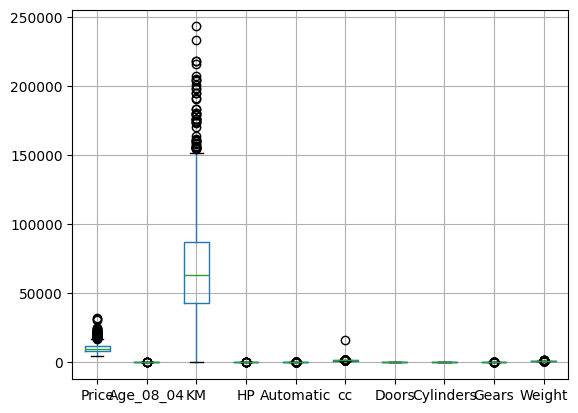

In [64]:
#outlier detection
df.boxplot()
plt.show()


In [65]:
#outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)


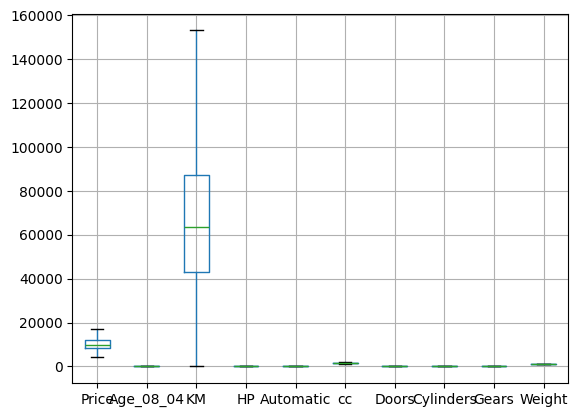

In [66]:
df.boxplot()
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

In [68]:
df.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,1264
Diesel,154
CNG,17


In [69]:
# ordinal encoder for fuel_type
ord_enc=OrdinalEncoder()
df[['Fuel_Type']]=ord_enc.fit_transform(df[['Fuel_Type']])

In [70]:
df=pd.get_dummies(df,dtype='int')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,46986.0,1.0,90.0,0.0,1900.0,3,4,5.0,1152.5
1,13750.0,23.0,72937.0,1.0,90.0,0.0,1900.0,3,4,5.0,1152.5
2,13950.0,24.0,41711.0,1.0,90.0,0.0,1900.0,3,4,5.0,1152.5
3,14950.0,26.0,48000.0,1.0,90.0,0.0,1900.0,3,4,5.0,1152.5
4,13750.0,30.0,38500.0,1.0,90.0,0.0,1900.0,3,4,5.0,1152.5
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,2.0,86.0,0.0,1300.0,3,4,5.0,1025.0
1432,10845.0,72.0,19000.0,2.0,86.0,0.0,1300.0,3,4,5.0,1015.0
1433,8500.0,71.0,17016.0,2.0,86.0,0.0,1300.0,3,4,5.0,1015.0
1434,7250.0,70.0,16916.0,2.0,86.0,0.0,1300.0,3,4,5.0,1015.0


In [71]:
df.Fuel_Type.value_counts()

,count
Fuel_Type,
2.0,1264
1.0,154
0.0,17


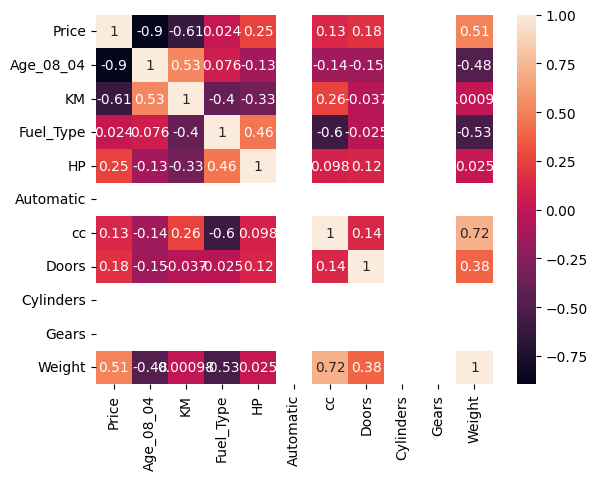

In [72]:
# Feature selection
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [73]:
#f_regression
from sklearn.feature_selection import f_regression

In [74]:
target=df[['Price']]
features=df.drop(columns=['Price'])

In [75]:
f_reg=f_regression(features,target)

In [76]:
features.columns

Index(['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [77]:
target.columns

Index(['Price'], dtype='object')

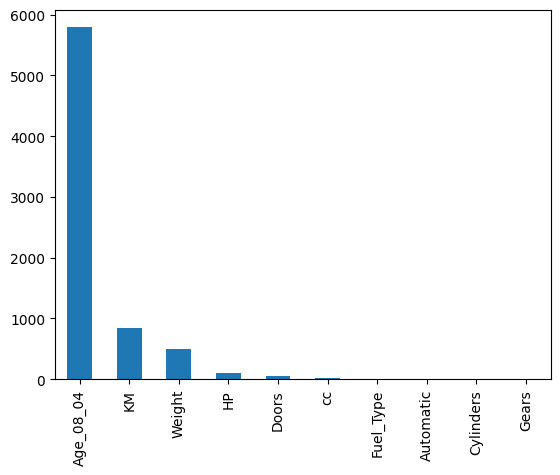

In [78]:
pd.Series(f_reg[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [79]:
#vif-multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
features.values

array([[2.3000e+01, 4.6986e+04, 1.0000e+00, ..., 4.0000e+00, 5.0000e+00,
        1.1525e+03],
       [2.3000e+01, 7.2937e+04, 1.0000e+00, ..., 4.0000e+00, 5.0000e+00,
        1.1525e+03],
       [2.4000e+01, 4.1711e+04, 1.0000e+00, ..., 4.0000e+00, 5.0000e+00,
        1.1525e+03],
       ...,
       [7.1000e+01, 1.7016e+04, 2.0000e+00, ..., 4.0000e+00, 5.0000e+00,
        1.0150e+03],
       [7.0000e+01, 1.6916e+04, 2.0000e+00, ..., 4.0000e+00, 5.0000e+00,
        1.0150e+03],
       [7.6000e+01, 1.0000e+00, 2.0000e+00, ..., 4.0000e+00, 5.0000e+00,
        1.1140e+03]])

In [81]:
vif=pd.DataFrame()
vif['features']=features.columns
vif['VIF']=[variance_inflation_factor(features.values,i) for i in range(len(features.columns))]

In [82]:
vif.sort_values(by='VIF',ascending=False)

,features,VIF
9,Weight,3.830834
5,cc,3.413709
2,Fuel_Type,2.927166
0,Age_08_04,2.131126
1,KM,2.004456
3,HP,1.856278
6,Doors,1.296663
7,Cylinders,0.000000
8,Gears,0.000000
4,Automatic,NaN


In [83]:
features.drop(columns=['Automatic','Gears','Cylinders'],inplace=True)

In [89]:
features.head()

,Age_08_04,KM,Fuel_Type,HP,cc,Doors,Weight
0,23.0,46986.0,1.0,90.0,1900.0,3,1152.5
1,23.0,72937.0,1.0,90.0,1900.0,3,1152.5
2,24.0,41711.0,1.0,90.0,1900.0,3,1152.5
3,26.0,48000.0,1.0,90.0,1900.0,3,1152.5
4,30.0,38500.0,1.0,90.0,1900.0,3,1152.5


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [110]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=150)


In [111]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 7)
(287, 7)
(1148, 1)
(287, 1)


In [112]:
# Standard Scalar
std_sca=StandardScaler()
x_train[['Age_08_04','KM','HP','cc','Weight']]=std_sca.fit_transform(x_train[['Age_08_04','KM','HP','cc','Weight']])
x_test[['Age_08_04','KM','HP','cc','Weight']]=std_sca.transform(x_test[['Age_08_04','KM','HP','cc','Weight']])

In [114]:
x_train.head()

,Age_08_04,KM,Fuel_Type,HP,cc,Doors,Weight
1180,1.125526,0.685132,2.0,0.696909,0.229569,5,0.165108
279,-0.963177,-0.630630,2.0,0.696909,0.229569,3,-0.356477
60,-1.820080,-0.882291,2.0,-0.276481,-0.924179,5,1.077880
268,-0.856064,-0.556628,1.0,-0.800614,1.960190,5,2.186247
778,0.643517,0.234300,2.0,-1.100119,-1.501053,3,-1.399645


In [115]:
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [116]:
lin_model.coef_

array([[-2021.11457758,  -561.59266272,   504.07697986,   251.34911476,
         -276.25514314,   -86.83761118,   890.14272797]])

In [117]:
lin_model.intercept_

array([9883.73202117])

In [118]:
#### Training validation
y_pred=lin_model.predict(x_train)


In [119]:
r2_score(y_train,y_pred)

0.8638769630689582

In [122]:
#### Testing validation
y1_pred=lin_model.predict(x_test)
r2_score(y_test,y1_pred)

0.8726408739441815

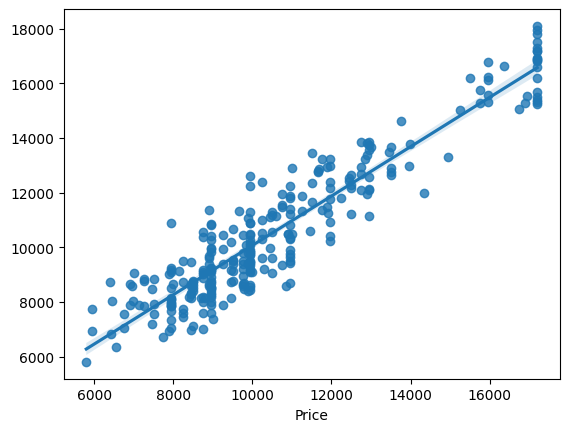

In [124]:
sns.regplot(x=y_test,y=y1_pred)
plt.show()

In [125]:
#lasso

In [126]:
from sklearn.linear_model import Lasso

In [129]:
lasso=Lasso(alpha=1.0,max_iter=1000)
lasso.fit(x_train,y_train)
lasso

Lasso()

In [130]:
y_train_pred=lasso.predict(x_train)
y_test_pred=lasso.predict(x_test)


In [131]:
print('training accuracy :',r2_score(y_train,y_train_pred))
print('testing accuracy :',r2_score(y_test,y_test_pred))

training accuracy : 0.8638741339573041
testing accuracy : 0.872470736064275


In [133]:
lasso.coef_

array([-2021.39529089,  -563.23105358,   488.41631206,   252.03877053,
        -273.68326101,   -83.65502433,   882.76633078])

In [134]:
lasso.intercept_

array([9900.11859906])

In [135]:
#ridge

In [136]:
from sklearn.linear_model import Ridge

In [137]:
ridge=Ridge(alpha=1.0,max_iter=1000)

In [138]:
ridge.fit(x_train,y_train)

Ridge(max_iter=1000)

In [139]:
y_train_pred=ridge.predict(x_train)
y_test_pred=ridge.predict(x_test)

In [140]:
print('Training_Acc:',r2_score(y_train,y_train_pred))
print('Testing_Acc:',r2_score(y_test,y_test_pred))

Training_Acc: 0.8638759963825148
Testing_Acc: 0.872586022760229


In [141]:
ridge.coef_

array([-2018.65414308,  -563.5628046 ,   494.37330486,   252.38837176,
        -276.21014349,   -85.94637613,   888.20746869])

In [142]:
ridge.intercept_

array([9898.20664971])

**What is Normalization & Standardization and how is it helpful?**
normalization is the process of adjusting values on different scales on common scale

Normalization refers to the process of adjusting values measured on different scales to the common scale

Standardization is the process of converting data to a common format to enable users to process and analyze it easily.

Both are feature scaling techniques to bring numerical features to a common scale.


**What techniques can be used to address multicollinearity in multiple linear regression?**
By using the regularization techniques like Ridge and Lasso regression to stabilize coefficient estimates. Another approach is to apply Principal Component Analysis (PCA) to transform correlated predictors into uncorrelated components. You can also remove highly correlated variables or combine them into a single feature. Increasing the sample size helps reduce variance and improves model reliability.